# Avocado data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import LabelEncoder 
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression

•	Date - The date of the observation
•	AveragePrice - the average price of a single avocado
•	type - conventional or organic
•	year - the year
•	Region - the city or region of the observation
•	Total Volume - Total number of avocados sold
•	4046 - Total number of avocados with PLU 4046 sold
•	4225 - Total number of avocados with PLU 4225 sold
•	4770 - Total number of avocados with PLU 4770 sold


In [3]:
df=pd.read_csv('avocado.csv')
df.head(2)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany


In [4]:
df.shape

(18249, 14)

In [5]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [6]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [8]:
df.nunique()

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [9]:
print("minimun date :",df["Date"].min())
print("max date :",df["Date"].max())

minimun date : 2015-01-04
max date : 2018-03-25


In [10]:
df["Date"]=pd.to_datetime(df.Date,format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.8+ MB


In [11]:
df.set_index('Date',inplace=True)

In [12]:
print(" ", df.duplicated().sum())

  0


In [13]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [14]:
df['year'].unique()

array([2015, 2016, 2017, 2018], dtype=int64)

In [15]:
grp1 = df.groupby(['year'])['AveragePrice'].mean()
grp1

year
2015    1.375590
2016    1.338640
2017    1.515128
2018    1.347531
Name: AveragePrice, dtype: float64

In [16]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [17]:
df['type']=df['type'].replace({'conventional':0,'organic':1})

In [18]:
grp2=df.groupby(['type'])['AveragePrice'].mean()
grp2

type
0    1.158040
1    1.653999
Name: AveragePrice, dtype: float64

In [19]:
grp3=df.groupby(['year','type',])['AveragePrice'].mean()
grp3

year  type
2015  0       1.077963
      1       1.673324
2016  0       1.105595
      1       1.571684
2017  0       1.294888
      1       1.735521
2018  0       1.127886
      1       1.567176
Name: AveragePrice, dtype: float64

In [20]:
grp4 = df.groupby('type').size()
grp4

type
0    9126
1    9123
dtype: int64

In [21]:
df['type'].unique()

array([0, 1], dtype=int64)

In [22]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,2018.000000


In [23]:
le=LabelEncoder()
df['region']=le.fit_transform(df['region'])
df['type']=le.fit_transform(df['type'])
df['year']=le.fit_transform(df['year'])

In [24]:
df[['Small Bags','Large Bags','XLarge Bags']].sum().sum()

4373175785.39

In [25]:
round(df['Total Bags'].sum(),2)

4373175798.39

In [26]:
df.drop(['Small Bags','Large Bags','XLarge Bags'],axis=1,inplace=True)

In [27]:
df.head(1)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,type,year,region
Date,,,,,,,,,
2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,0,0,0


 values are same so , we can drop the features , to avoid multicollinearity

EDA-visualization for categorical features using barplot

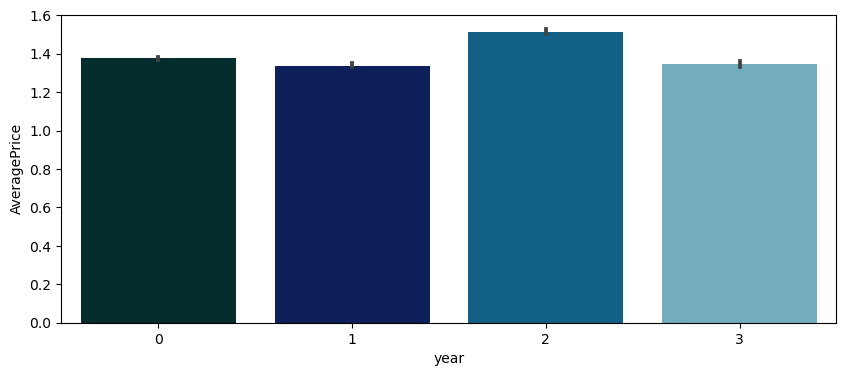

In [28]:
f, ax = plt.subplots(figsize=(10, 4))
ax = sns.barplot(x='year', y='AveragePrice', data=df, palette=("ocean"))

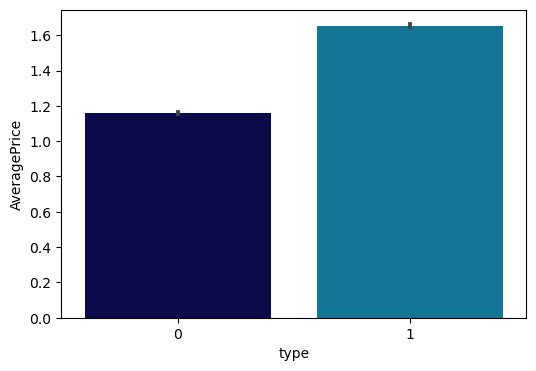

In [29]:
f, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x='type', y='AveragePrice', data=df, palette=("ocean"))

visualization for numerical features using line and scatter plots 

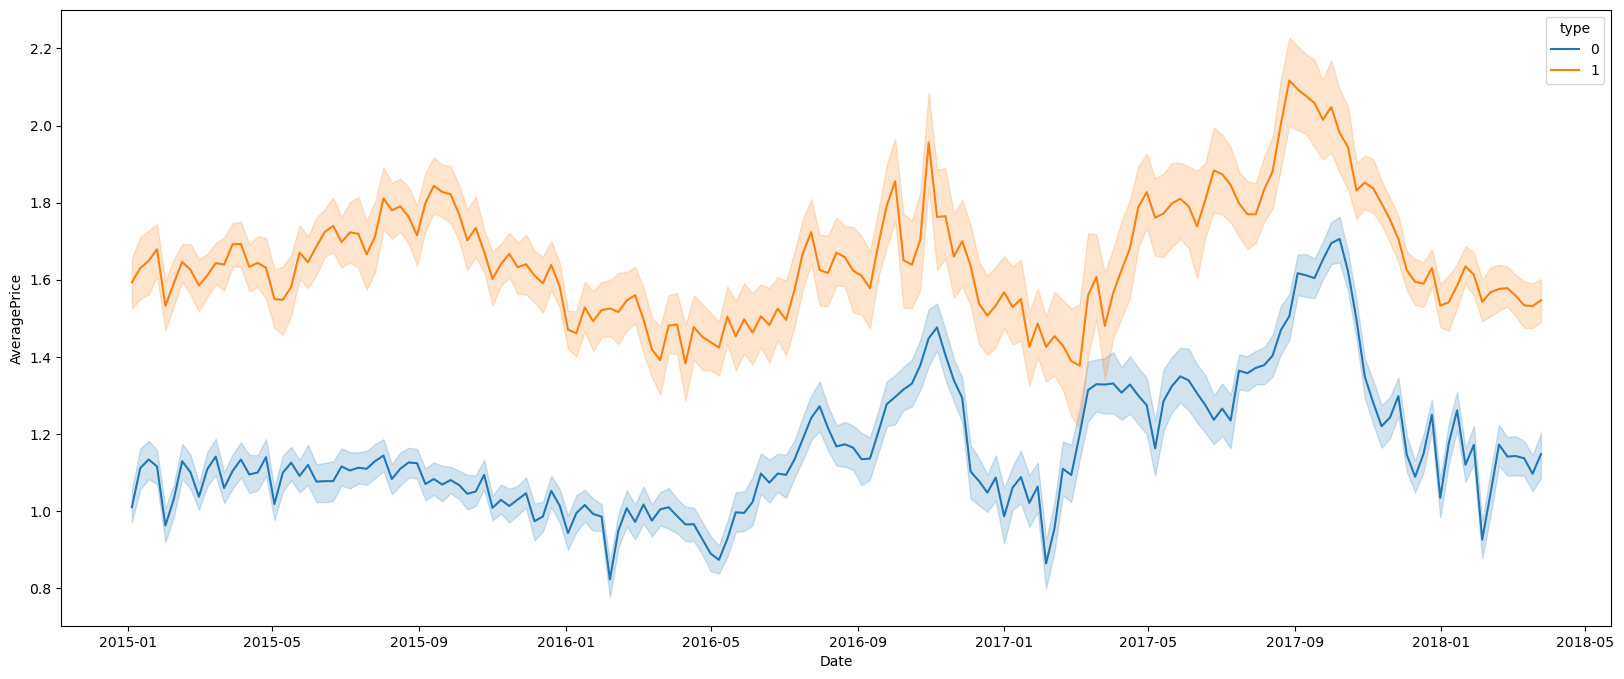

In [30]:
plt.figure(figsize=(20,8))
sns.lineplot(x='Date', y='AveragePrice', data=df, hue='type')
plt.show()

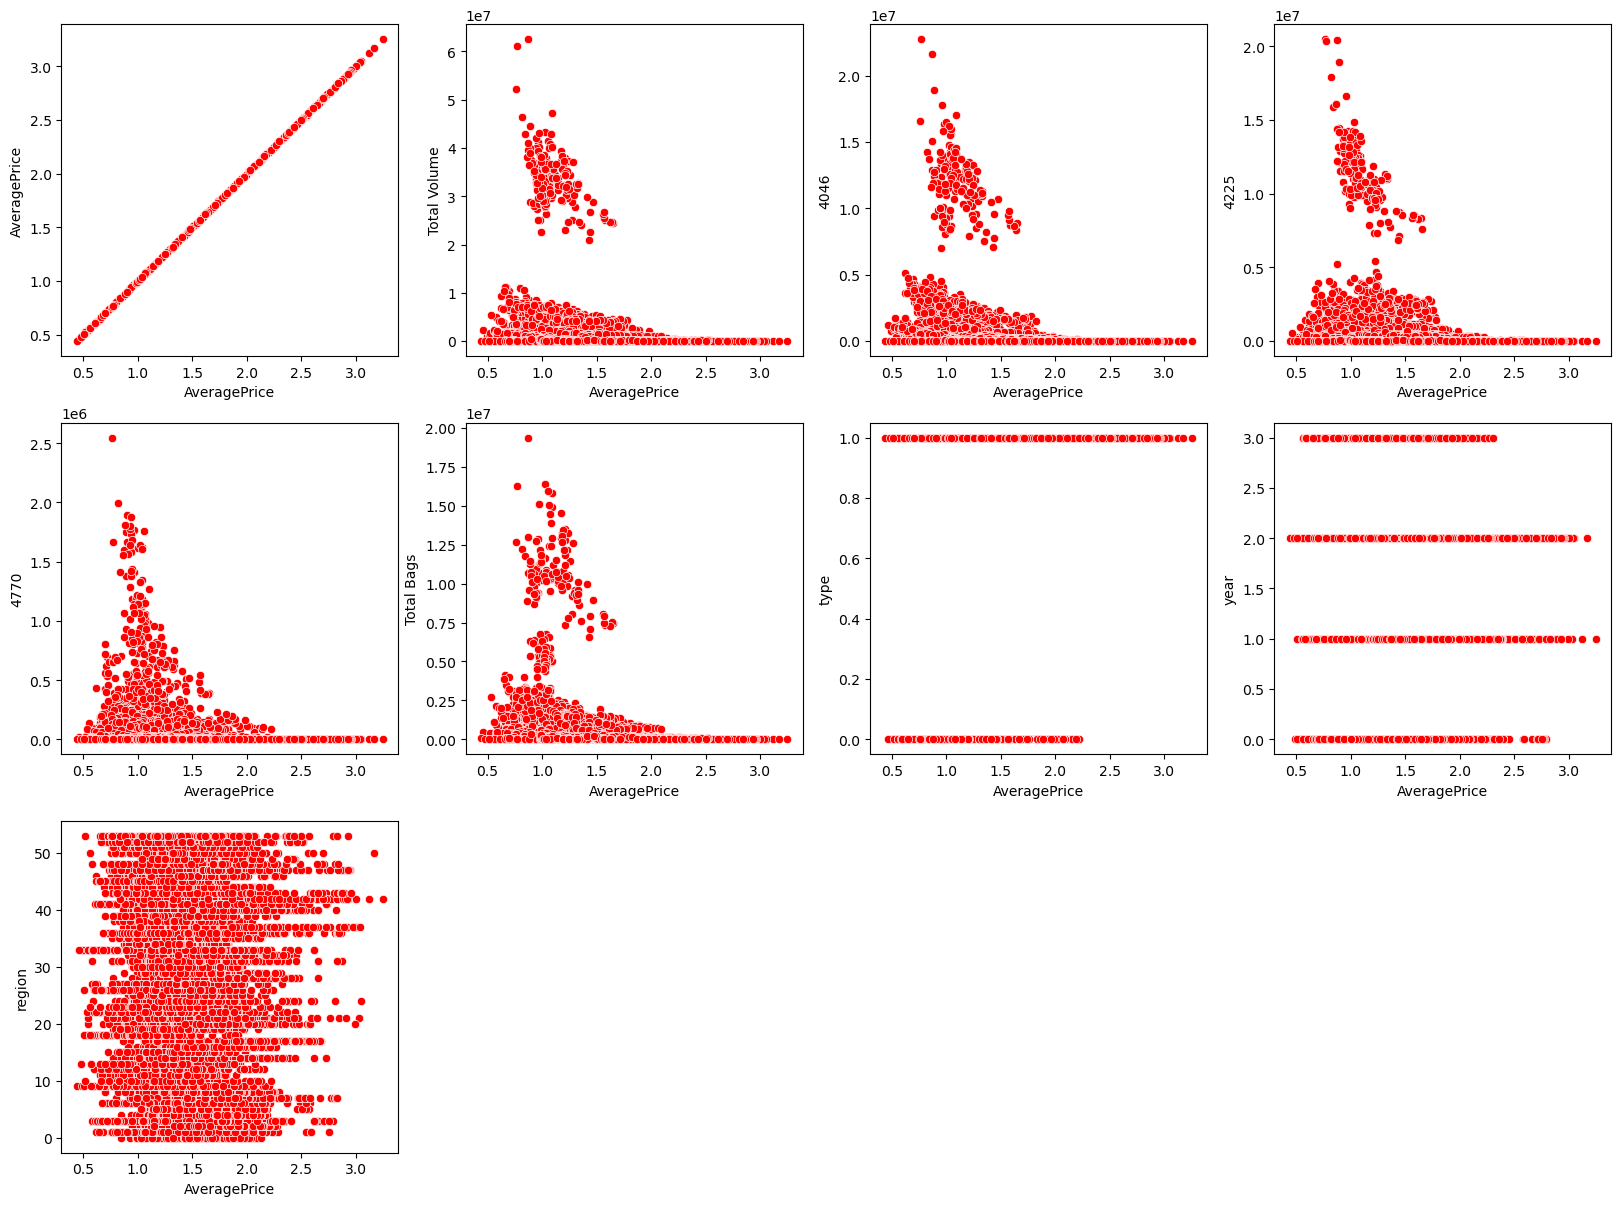

In [31]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=14:
        plt.subplot(5,4,p)
        sns.scatterplot(x='AveragePrice',y=i,data=df,color='r')
        plt.xlabel("AveragePrice")
        plt.ylabel(i)
    p+=1
plt.show()

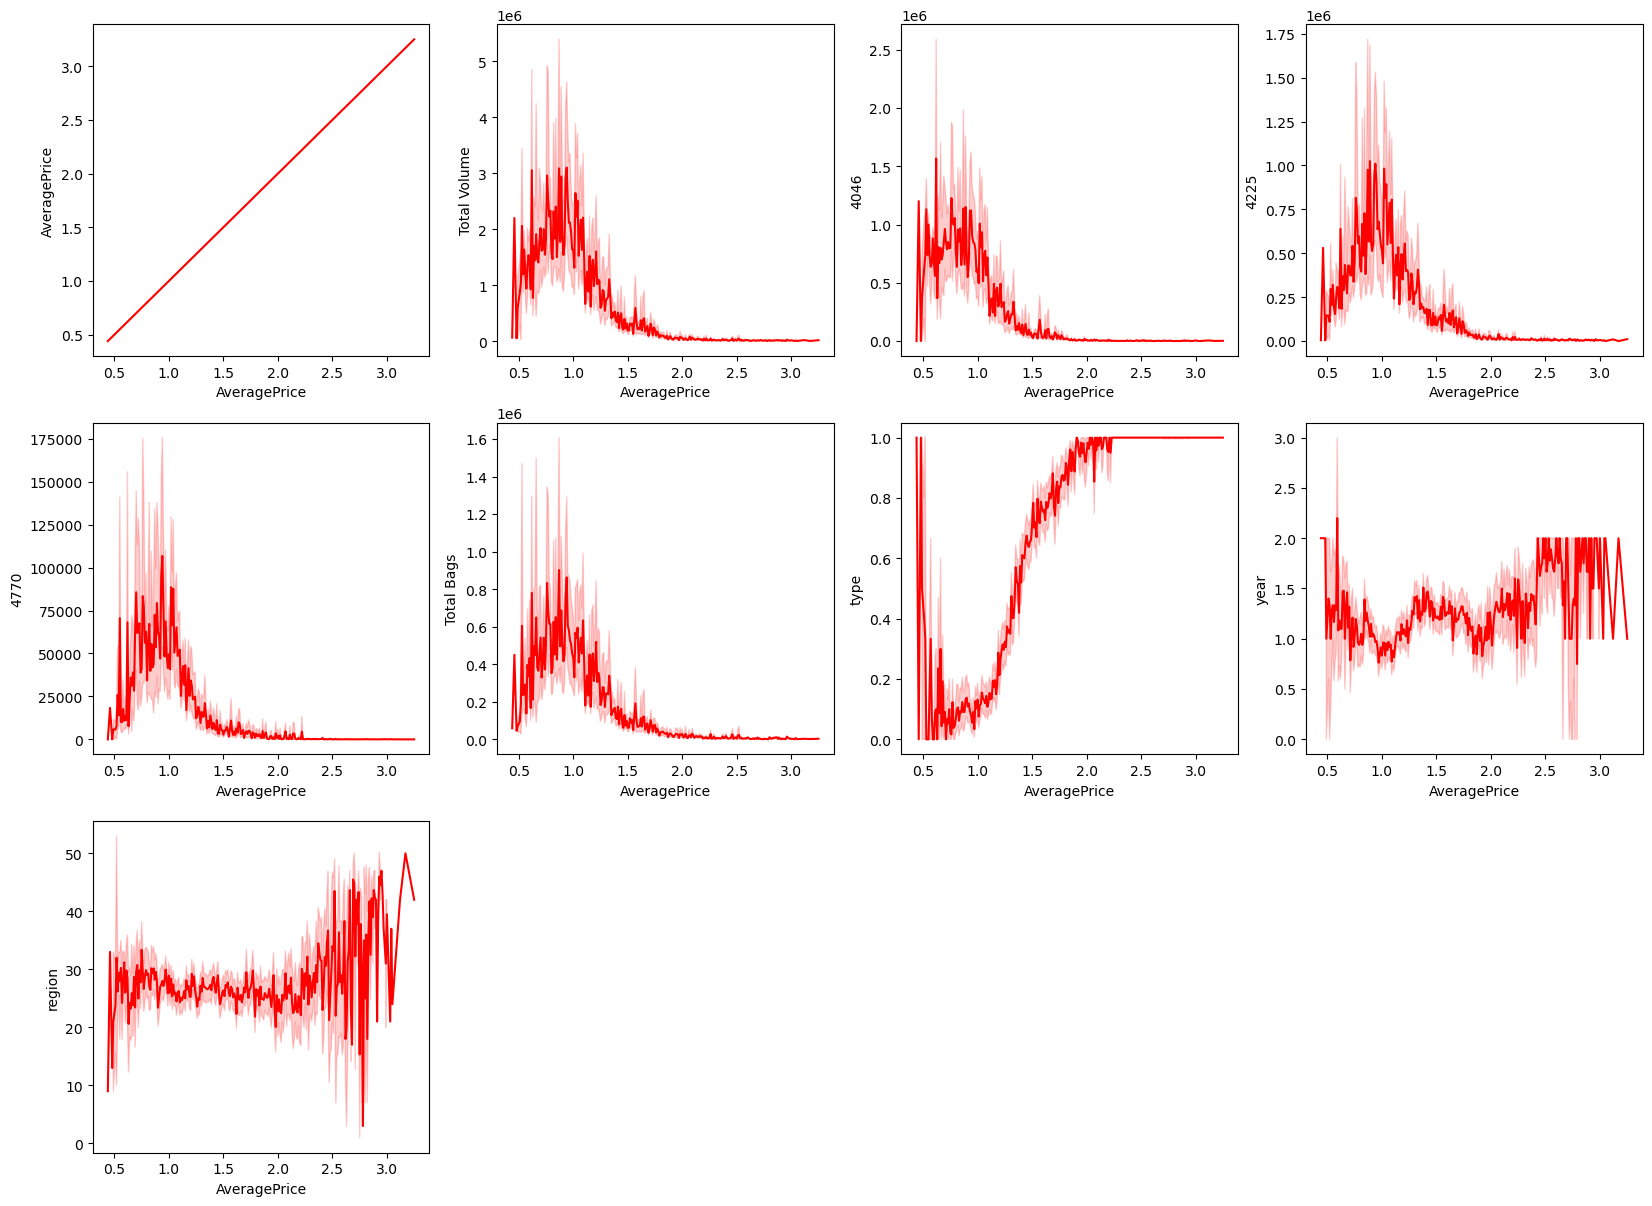

In [32]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=14:
        plt.subplot(5,4,p)
        sns.lineplot(x='AveragePrice',y=i,data=df,color='r')
        plt.xlabel("AveragePrice")
        plt.ylabel(i)
    p+=1
plt.show()


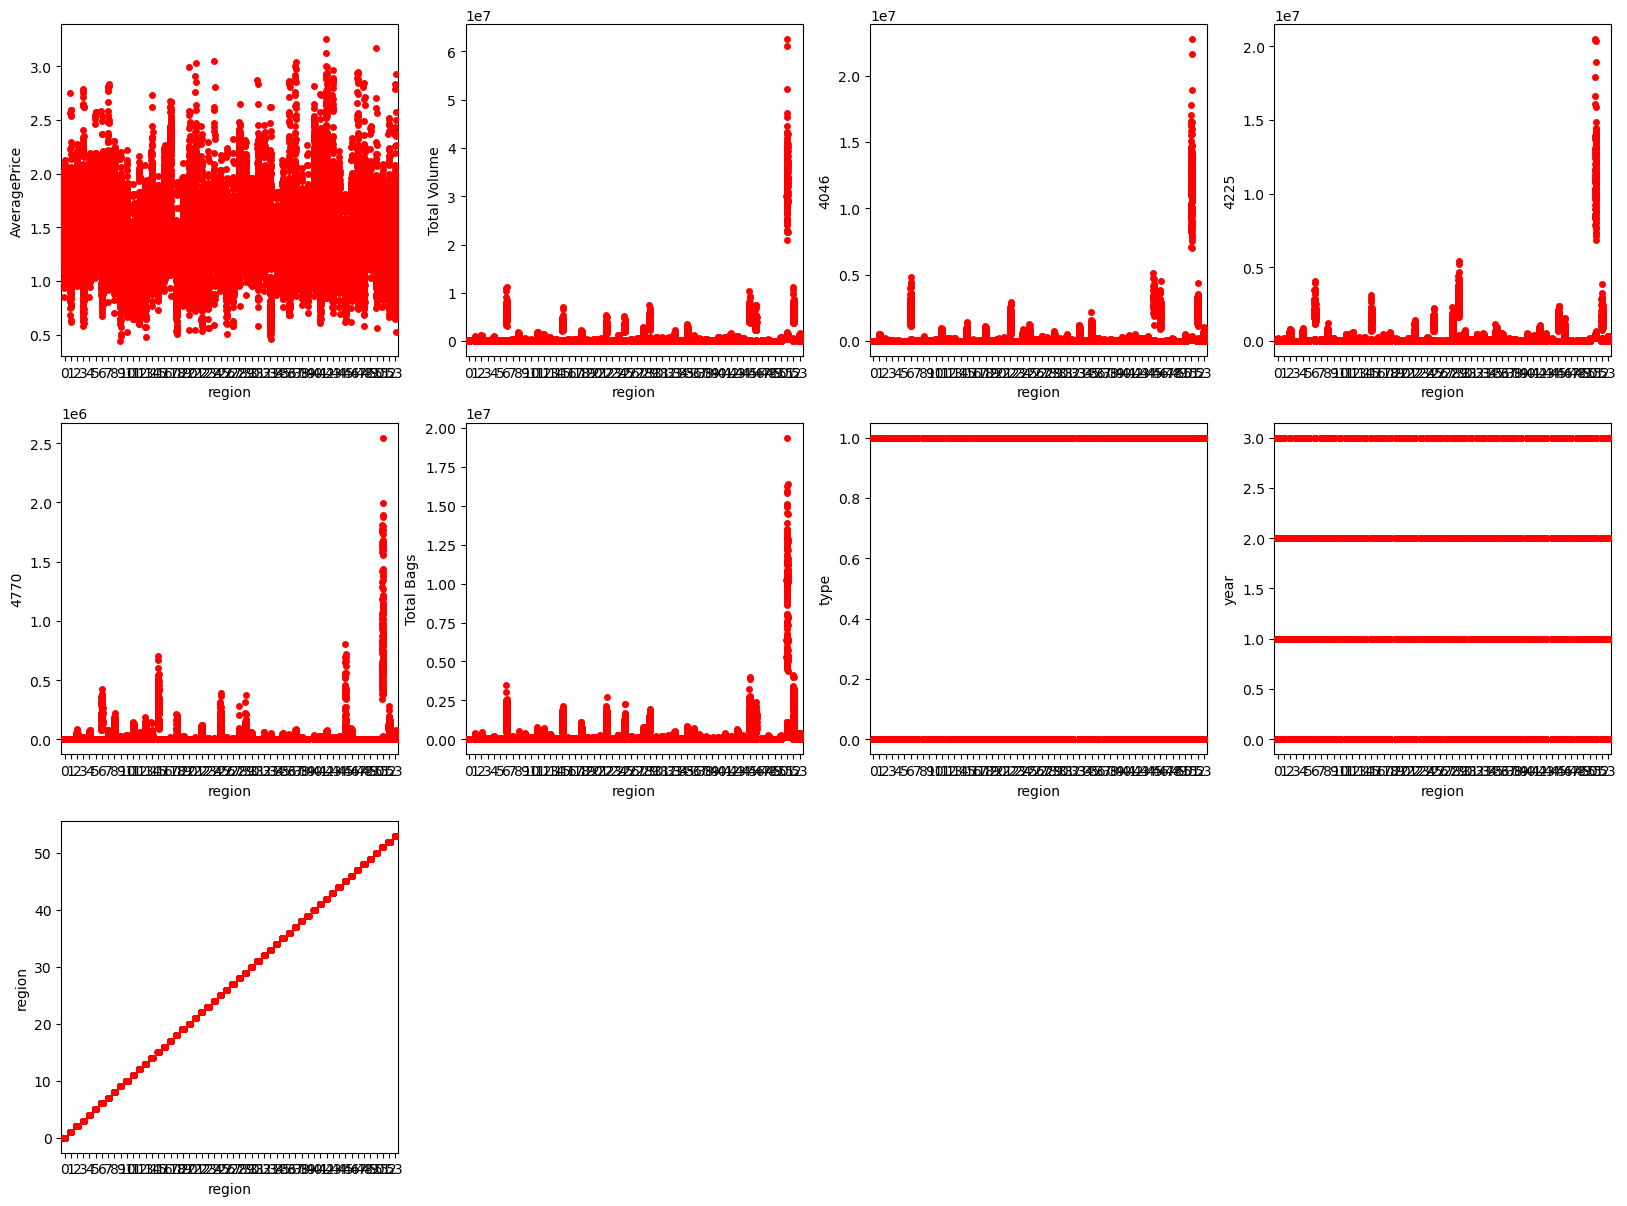

In [33]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=14:
        plt.subplot(5,4,p)
        sns.stripplot(x='region',y=i,data=df,color='r')
        plt.xlabel("region")
        plt.ylabel(i)
    p+=1
plt.show()


understanding the data distribution in each feature

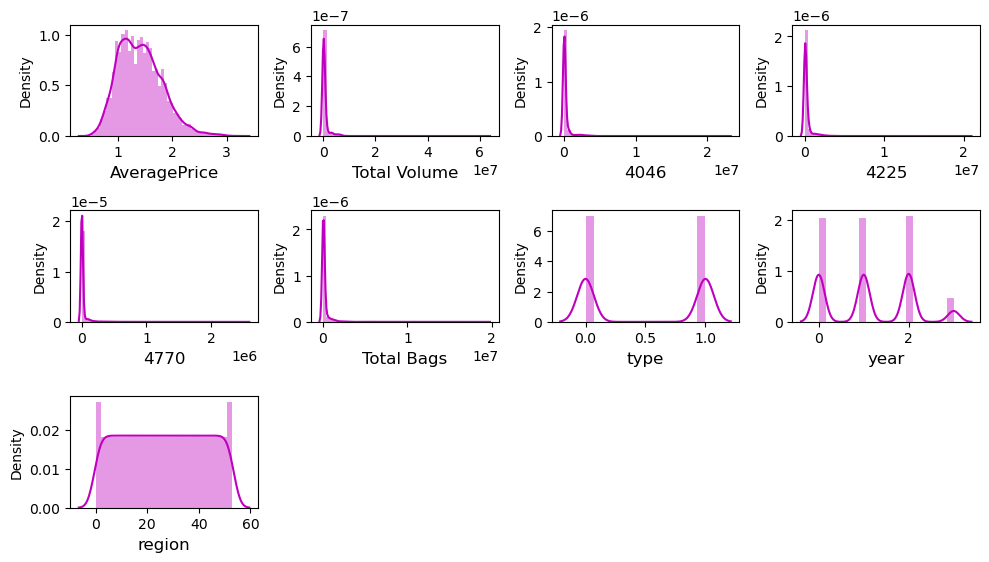

In [34]:
plt.figure(figsize=(10,9),facecolor="white")
pltno=1
for col in df:
    if pltno<=14:
        ax=plt.subplot(5,4,pltno)
        sns.distplot(df[col],color="m")
        plt.xlabel(col,fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
    pltno+=1
plt.tight_layout()

we observe that there is a lot of data that is skewed towards right,let us identify if there are any outliers present

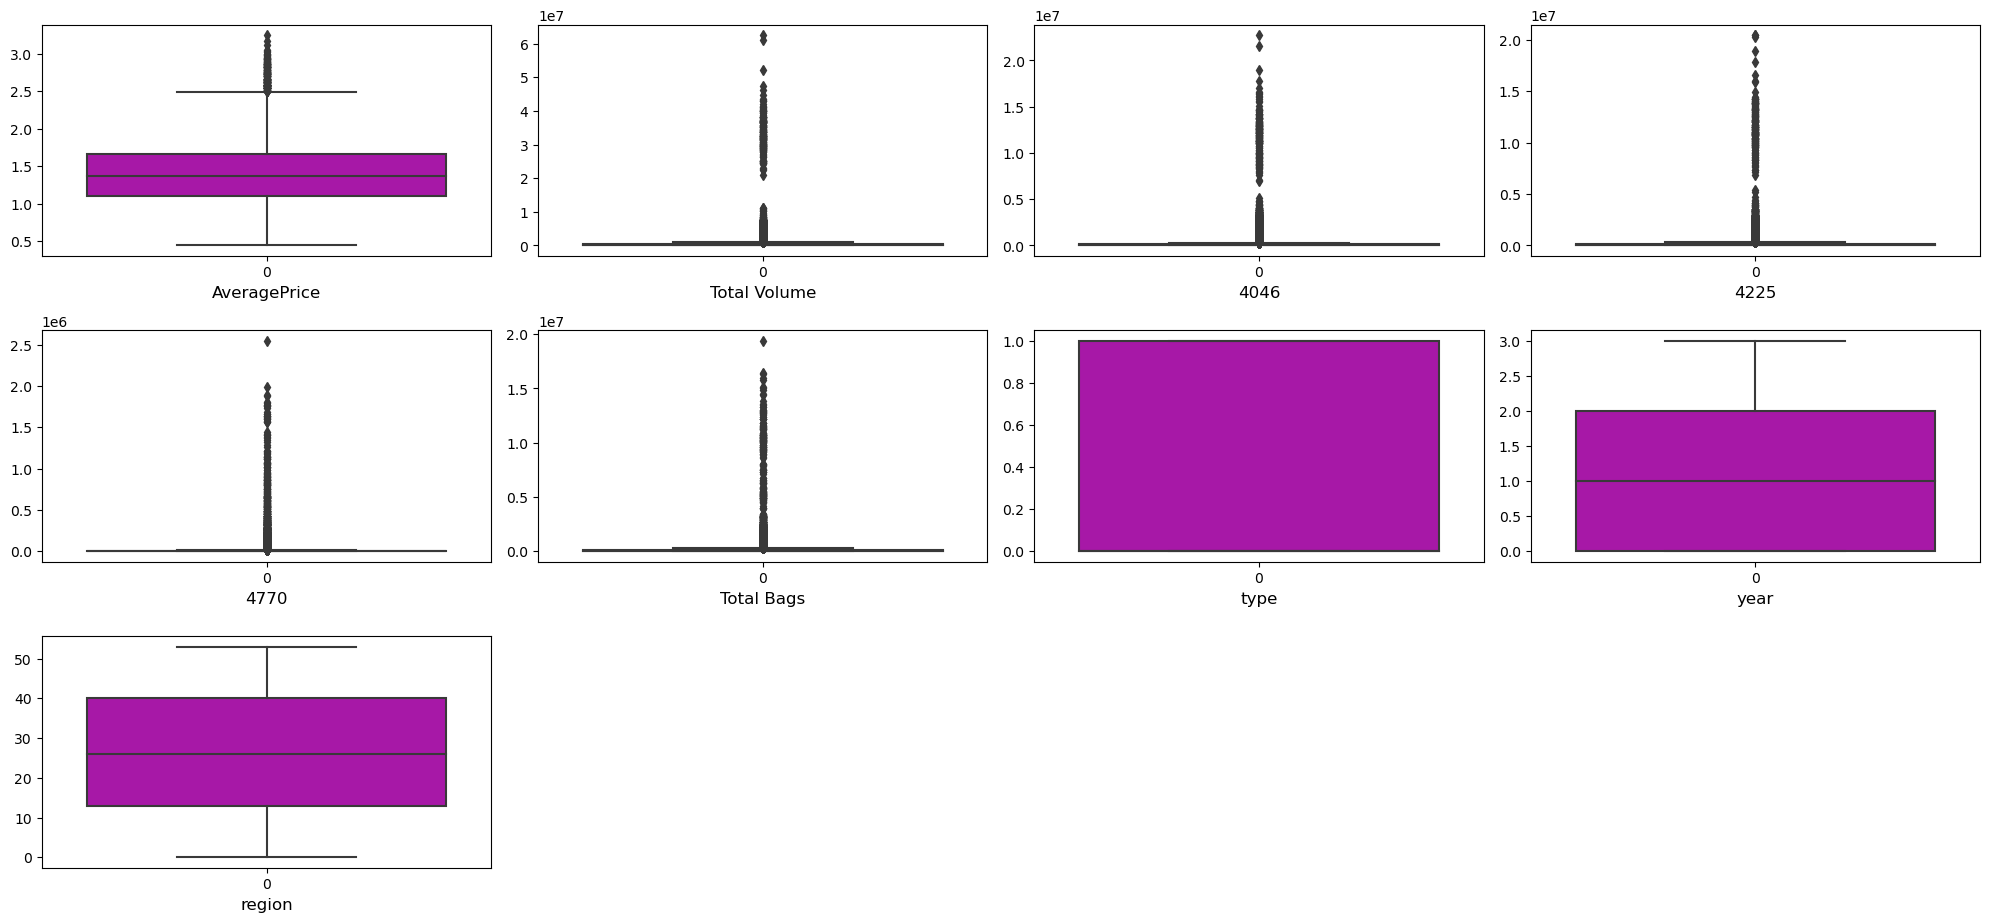

In [35]:
plt.figure(figsize=(20,15),facecolor="white")
pltno=1
for i in df:
    if pltno<=14:
        plt.subplot(5,4,pltno)
        sns.boxplot(df[i],color="m")
        plt.xlabel(i,fontsize=12)
    pltno+=1
plt.tight_layout()

In [36]:
df.shape

(18249, 9)

In [37]:
z=np.abs(zscore(df))
threshold=3
df1=df[(z<3).all(axis=1)]

In [38]:
df1.shape

(17823, 9)

In [39]:
print("data loss ",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

data loss  2.3343744862732203


In [40]:
q1=df.quantile(.25)
q3=df.quantile(.75)
iqr=q3-q1
df2=df[~((df<(q1-1.5*iqr)) | (df>(q3+1.5*iqr))).any(axis=1)]

In [41]:
df2.shape

(13330, 9)

In [42]:
print("data loss ",((df.shape[0]-df2.shape[0])/df.shape[0])*100)

data loss  26.954901638445943


In [43]:
df=df1
df.head(2)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,type,year,region
Date,,,,,,,,,
2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,0,0,0
2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,0,0,0


In [73]:
df.skew()

AveragePrice    0.384974
Total Volume    3.638205
4046            4.450558
4225            4.128335
4770            4.792655
Total Bags      4.330215
type           -0.018069
year            0.221932
region          0.012571
dtype: float64

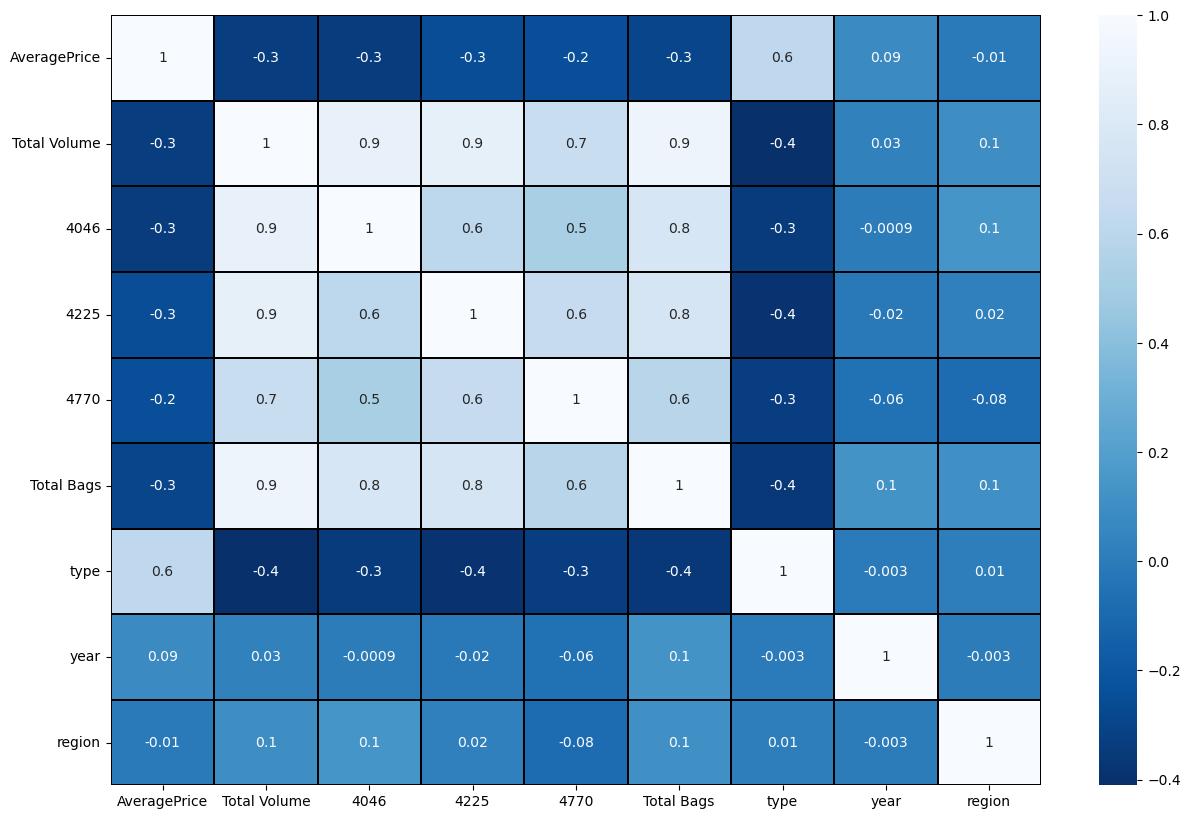

In [46]:
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(),linewidths=0.1,fmt='.1g',linecolor="black",annot=True,cmap="Blues_r")
plt.yticks(rotation=0)
plt.show()

most of the features have good correlation with the other features

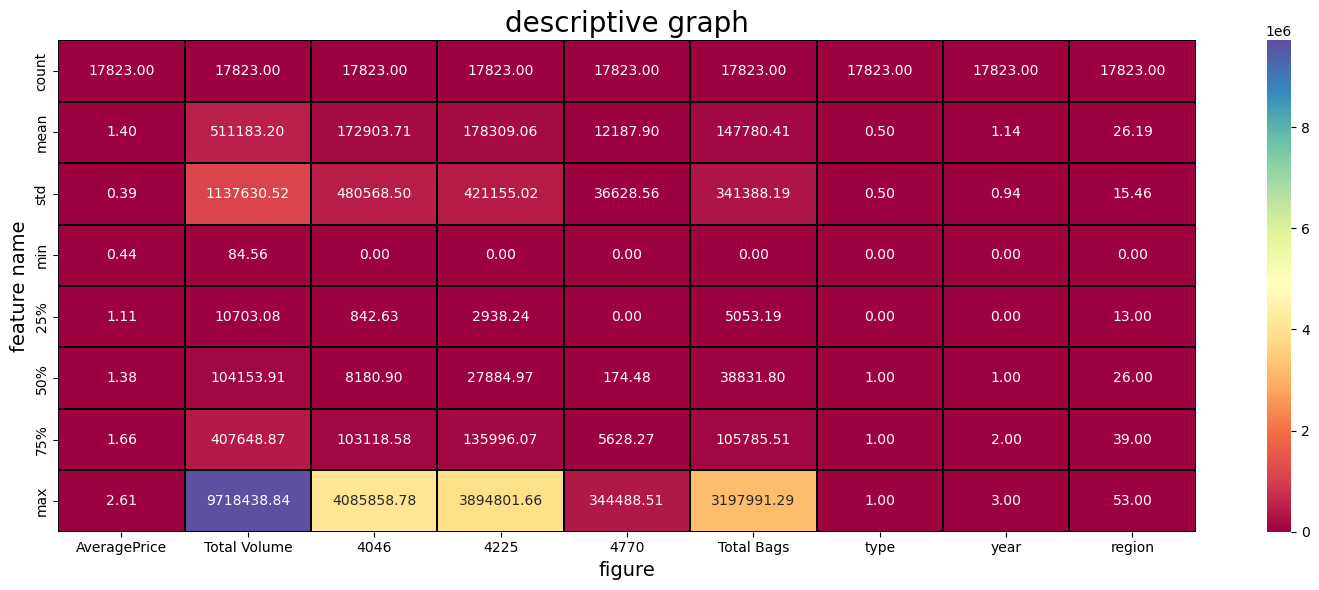

In [47]:
plt.figure(figsize=(15,6),facecolor="white")
sns.heatmap(df.describe(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Spectral')
plt.xlabel('figure',fontsize=14)
plt.ylabel('feature name',fontsize=14)
plt.title('descriptive graph',fontsize=20)
plt.tight_layout()

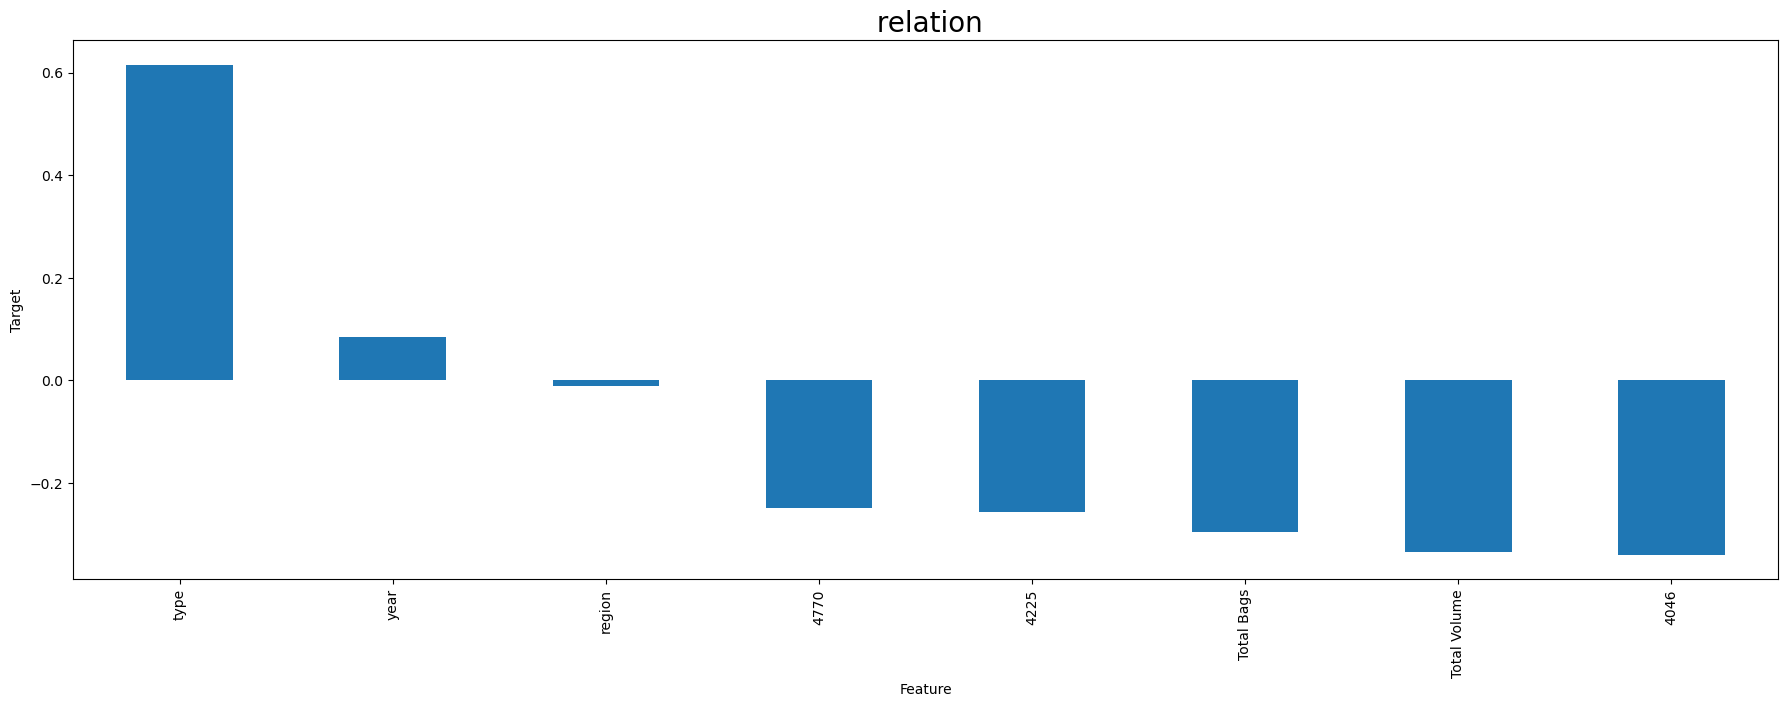

In [48]:
plt.figure(figsize=(22,7))
df.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title(" relation",fontsize=20)
plt.show()

separte features and label

In [49]:
x=df.drop(['type','region'],axis=1)
y=df['AveragePrice']
print("feature dimension",x.shape)
print("label dimension",y.shape)

feature dimension (17823, 7)
label dimension (17823,)


In [50]:
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x.head(2)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,year
0,-0.186852,-0.392886,-0.357643,-0.294090,-0.331438,-0.407417,-1.216592
1,-0.135025,-0.401114,-0.358397,-0.317399,-0.331160,-0.405048,-1.216592


In [51]:
vif = pd.DataFrame()
vif[" VIF val"]= [variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Feature"]=x.columns
vif

,VIF val,Feature
0,1.151468e+00,AveragePrice
1,5.220750e+08,Total Volume
2,9.316112e+07,4046
3,7.155006e+07,4225
4,5.411870e+05,4770
5,4.701588e+07,Total Bags
6,1.088543e+00,year


In [52]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor

from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,GradientBoostingClassifier,GradientBoostingRegressor,ExtraTreesClassifier,ExtraTreesRegressor,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error, r2_score, classification_report, confusion_matrix, roc_curve

from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,Ridge,LassoCV,RidgeCV
from sklearn.svm import SVC,SVR

from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)

In [54]:
model={'dt':DecisionTreeRegressor(),'rf':RandomForestRegressor(),'lR': LinearRegression(),
       'svr': SVR(),'knn':KNeighborsRegressor(n_neighbors=3),'LS':Lasso(),'RG':Ridge(),'etc':ExtraTreesRegressor(),
       'gb':GradientBoostingRegressor(),}     
print(model)

{'dt': DecisionTreeRegressor(), 'rf': RandomForestRegressor(), 'lR': LinearRegression(), 'svr': SVR(), 'knn': KNeighborsRegressor(n_neighbors=3), 'LS': Lasso(), 'RG': Ridge(), 'etc': ExtraTreesRegressor(), 'gb': GradientBoostingRegressor()}


In [55]:
y_preds = {}
for key, value in model.items():
    value.fit(x_train, y_train)
    y_pred = value.predict(x_test)
    y_preds[key] = y_pred
y_pred

array([1.15121712, 0.94017397, 0.696878  , ..., 1.4887538 , 1.86067268,
       0.82548868])

In [56]:
value.score(x_train,y_train)

0.9999566066401726

In [57]:
value.score(x_test,y_test)

0.9999572160374816

In [58]:
mae = {}
mse = {}
r2 = {}
rmse = {}
acc={}
for key, value in y_preds.items():
    mae[key] = mean_absolute_error(y_test, value)
    mse[key] = mean_squared_error(y_test, value)
    r2[key] = r2_score(y_test, value)
    rmse[key] = np.sqrt(mse[key])
    
    
details = pd.DataFrame({
    'MAE': mae,
    'MSE': mse,
    'R-squared': r2,
    'RMSE': rmse,
})
print("\n details for each model:")
print(details)
best_model =min(rmse, key=rmse.get)
print("\nBest Model based on RMSE:", best_model)



 details for each model:
              MAE           MSE  R-squared          RMSE
dt   8.415147e-06  2.524544e-07   0.999998  5.024484e-04
rf   2.791024e-05  3.512791e-07   0.999998  5.926880e-04
lR   4.944307e-16  3.805772e-31   1.000000  6.169094e-16
svr  5.722101e-02  4.077734e-03   0.973476  6.385713e-02
knn  1.186816e-02  7.180770e-04   0.995329  2.679696e-02
LS   3.195763e-01  1.539405e-01  -0.001334  3.923525e-01
RG   2.385467e-05  8.696652e-10   1.000000  2.949009e-05
etc  5.326788e-05  2.809846e-07   0.999998  5.300798e-04
gb   1.844918e-03  6.577408e-06   0.999957  2.564646e-03

Best Model based on RMSE: lR


In [59]:
final_model = LinearRegression()
final_model.fit(x_train, y_train)


LinearRegression()

In [71]:
final_model.coef_.mean()

0.05512771011530173

In [72]:
final_model.intercept_

1.4021051450373117

In [60]:
lcv=LassoCV(alphas= None, max_iter=50)
lcv.fit(x_train,y_train)

LassoCV(max_iter=50)

In [61]:
alpha=lcv.alpha_
alpha

0.0003826638133676097

In [62]:
lso_reg=Lasso(alpha)
lso_reg.fit(x_train,y_train)

Lasso(alpha=0.0003826638133676097)

In [63]:
lso_reg.score(x_test,y_test)

0.9999989986657638

In [64]:
ridgecv=RidgeCV(alphas=np.arange(0.0001,0.1,0.01))
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.0001, 0.0101, 0.0201, 0.0301, 0.0401, 0.0501, 0.0601, 0.0701,
       0.0801, 0.0901]))

In [65]:
ridgecv.alpha_ 

0.0001

In [66]:
rid_model=Ridge(alpha=ridgecv.alpha_)
rid_model.fit(x_train,y_train)

Ridge(alpha=0.0001)

In [67]:
rid_model.score(x_test,y_test)

0.9999999999999999

In [69]:
import pickle
pickle.dump (final_model, open('LR_model', 'wb'))